# Plot HeatBalance
https://unmethours.com/question/20720/energy-plus-calculate-zone-energy-balance-manually/

There are additional efforts in need for further manual processing or modification:
1. Copy area table from eplustbl.csv
2. Change primary floor for atrium as 0
Note: this should be altered in the previous ipynb file.
```
zone_meta, _ = build_zone_meta_from_csvs(
    summary_csv="ref/zones_by_floor_summary.csv",
    areas_csv="ref/zone_areas.csv",
    mode="primary"   # or "primary"
)
```

In [16]:
%matplotlib inline
import pandas as pd
from __pltReIDF import (
    load_long, compute_aggs, get_df, plot_heat_balance,
    build_zone_meta_from_csvs)
areas = None  # optional
eplusout_path= "/Users/rui.bo/Desktop/Working/1-phd_mainworks/Y3/eplus_heat_balance/idf-Oct/GEN_ReIDF/HVACDetailed-Oct-13_modified_2/eplusout.csv"

zone_meta, _ = build_zone_meta_from_csvs(
    summary_csv="ref/zones_by_floor_summary.csv",
    areas_csv="ref/zone_areas.csv",
    mode="primary"   # or "primary"
)
long_df = load_long(eplusout_path, assume_year=2021, zone_meta_df=zone_meta)
aggs = compute_aggs(long_df)

In [17]:
df_bldg = get_df(aggs, scale="yearly", scope="building", units="kWh", per_m2=True, long_df_for_area=long_df)
df_bldg

,Year,Variable,Value,Value_per_m2
0,2021,Zone Air Heat Balance Air Energy Storage Rate ...,5308.425890,0.556459
1,2021,Zone Air Heat Balance Internal Convective Heat...,499931.340850,52.405572
2,2021,Zone Air Heat Balance Interzone Air Transfer R...,0.000000,0.000000
3,2021,Zone Air Heat Balance Outdoor Air Transfer Rat...,-469745.396582,-49.241314
4,2021,Zone Air Heat Balance Surface Convection Rate ...,-5277.414814,-0.553208
5,2021,Zone Air Heat Balance System Air Transfer Rate...,-199353.487686,-20.897337
6,2021,Zone Air Heat Balance System Convective Heat G...,179708.067050,18.837995


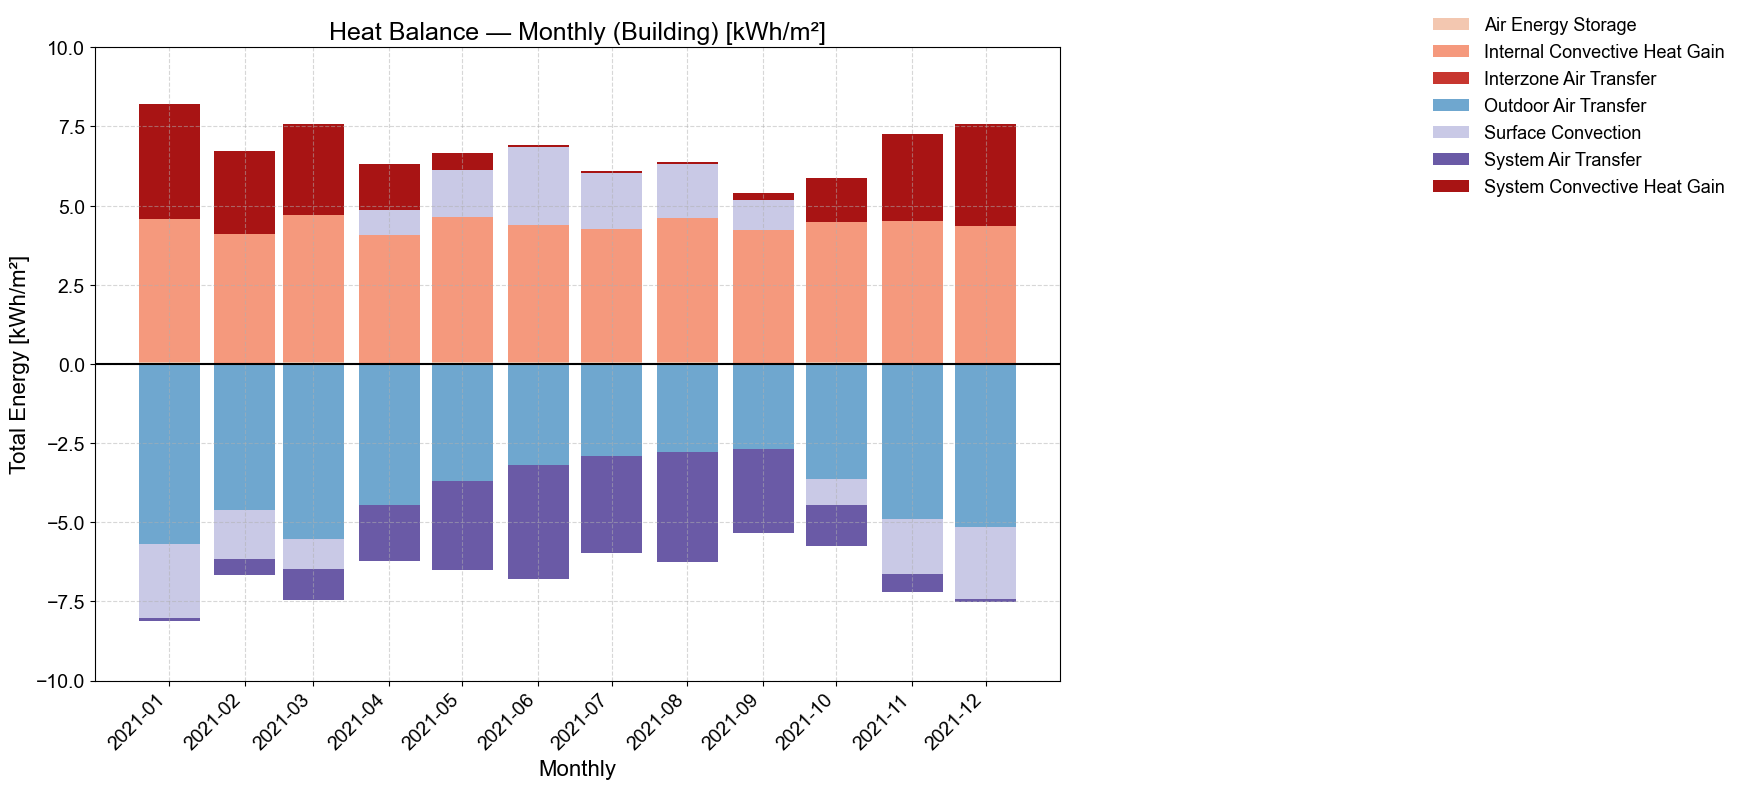

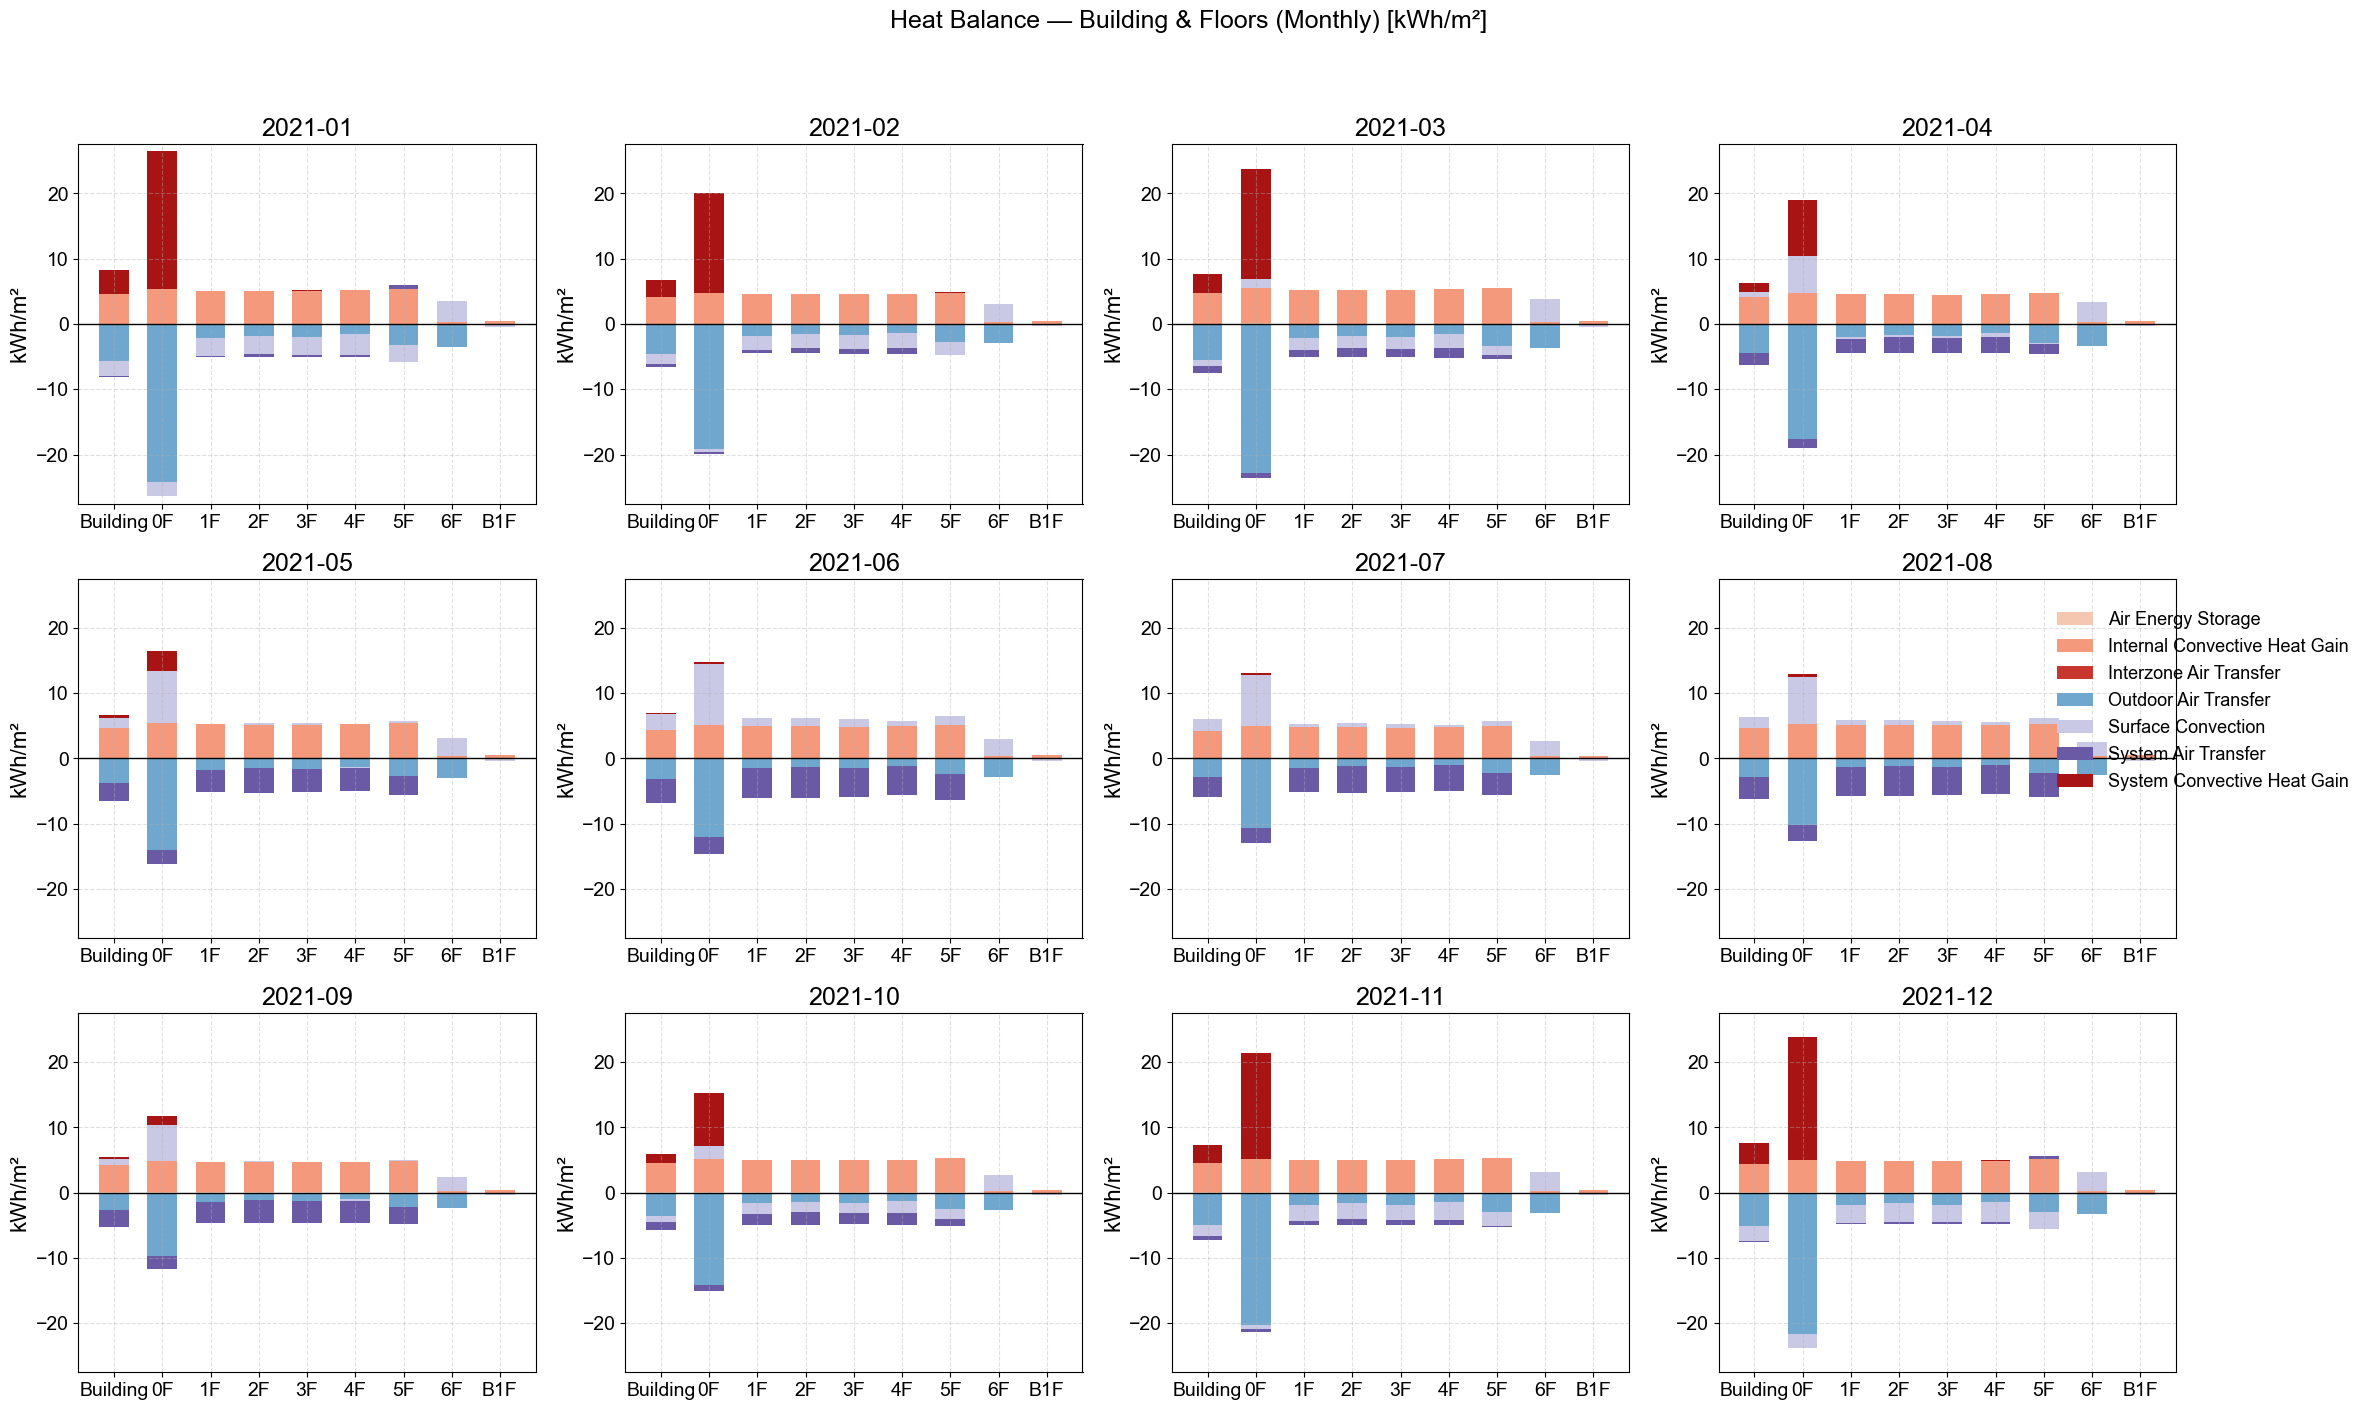

In [18]:
# Your fixed colors (cleaned names)
from __pltReIDF import plot_month_compare_across_building_and_floors


USER_COLORS = {
    "Air Energy Storage": "#f3c7b0",
    "Internal Convective Heat Gain": "#f5997d",
    "Interzone Air Transfer": "#c7362f",
    "Outdoor Air Transfer": "#6fa7cf",
    "Surface Convection": "#c9c9e6",
    "System Air Transfer": "#6a5aa6",
    "System Convective Heat Gain": "#a81414",
}

# Building-only (unchanged)
df_bldg = get_df(aggs, scale="monthly", scope="building",
                 units="kWh", per_m2=True, long_df_for_area=long_df)
plot_heat_balance(df_bldg, scale="monthly", scope="building",
                  units="kWh", per_m2=True,
                  fixed_color_map=USER_COLORS, strict_colors=True)

# Building vs floors, months grid — with 1F, 2F, … and B1F for -1
plot_month_compare_across_building_and_floors(
    aggs=aggs,
    long_df=long_df,
    floors=list(range(-1, 7)),
    units="kWh",
    per_m2=True,
    fixed_color_map=USER_COLORS,
    strict_colors=True,
    floor_labeler=lambda f: (f"{int(f)}F" if int(f) >= 0 else f"B{abs(int(f))}F")
)


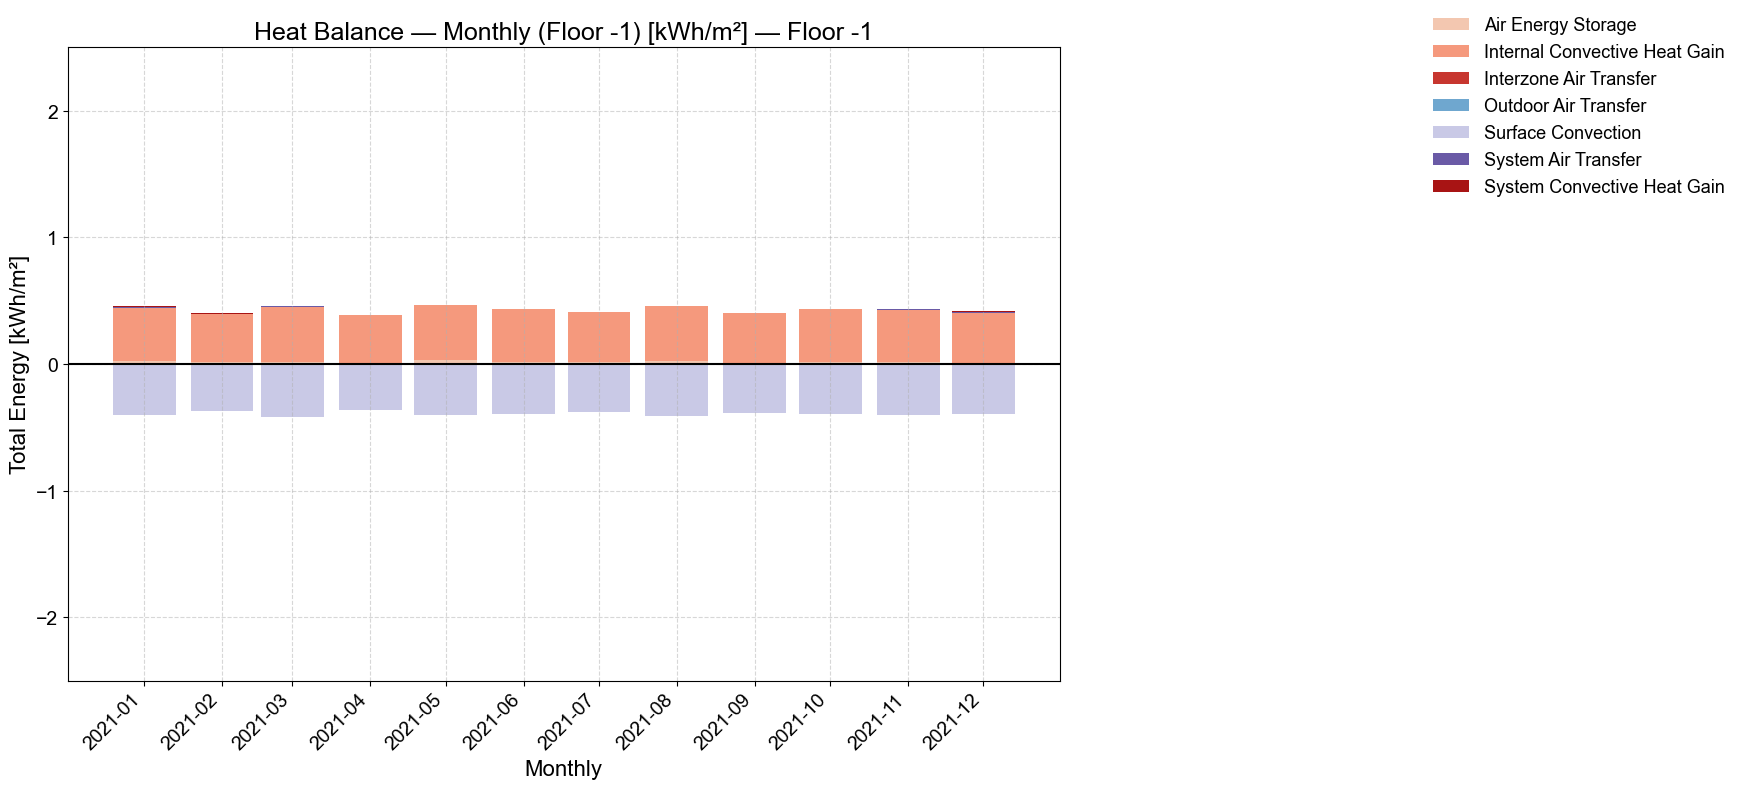

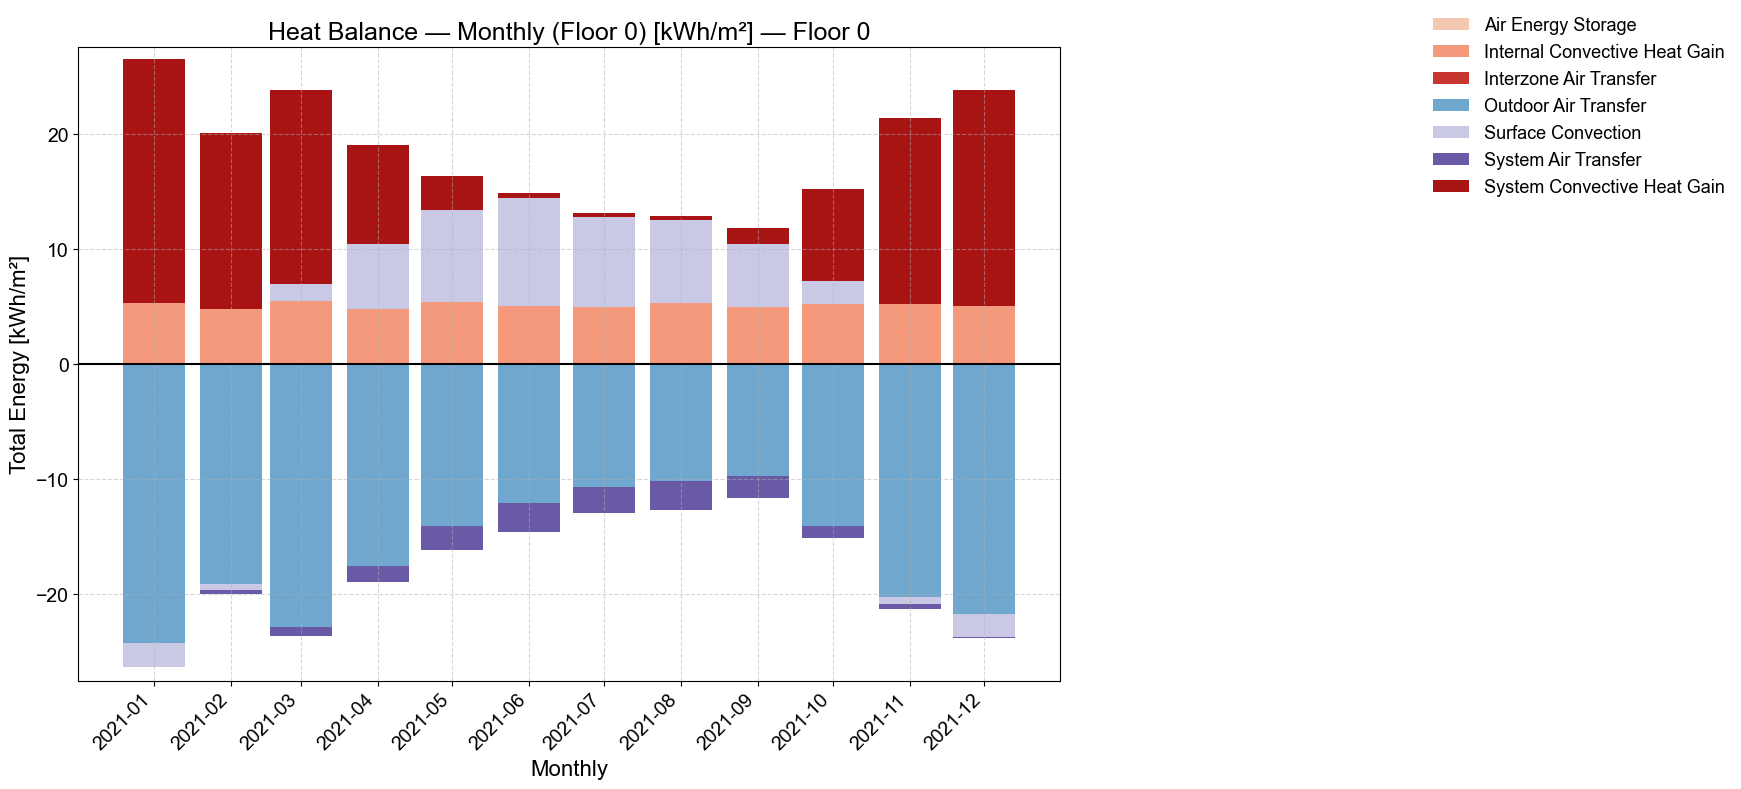

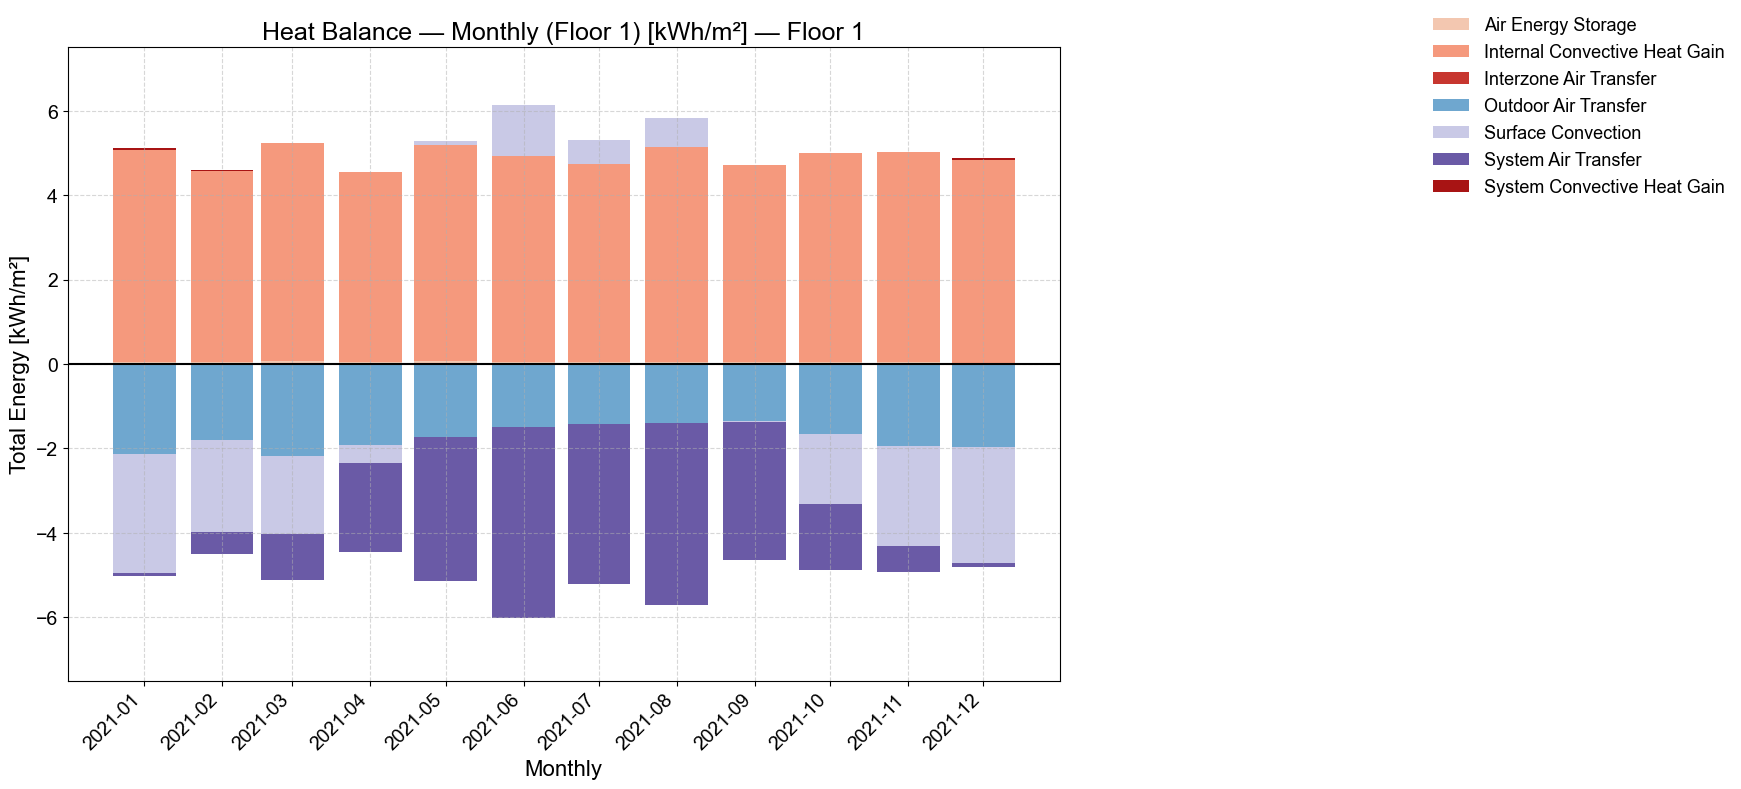

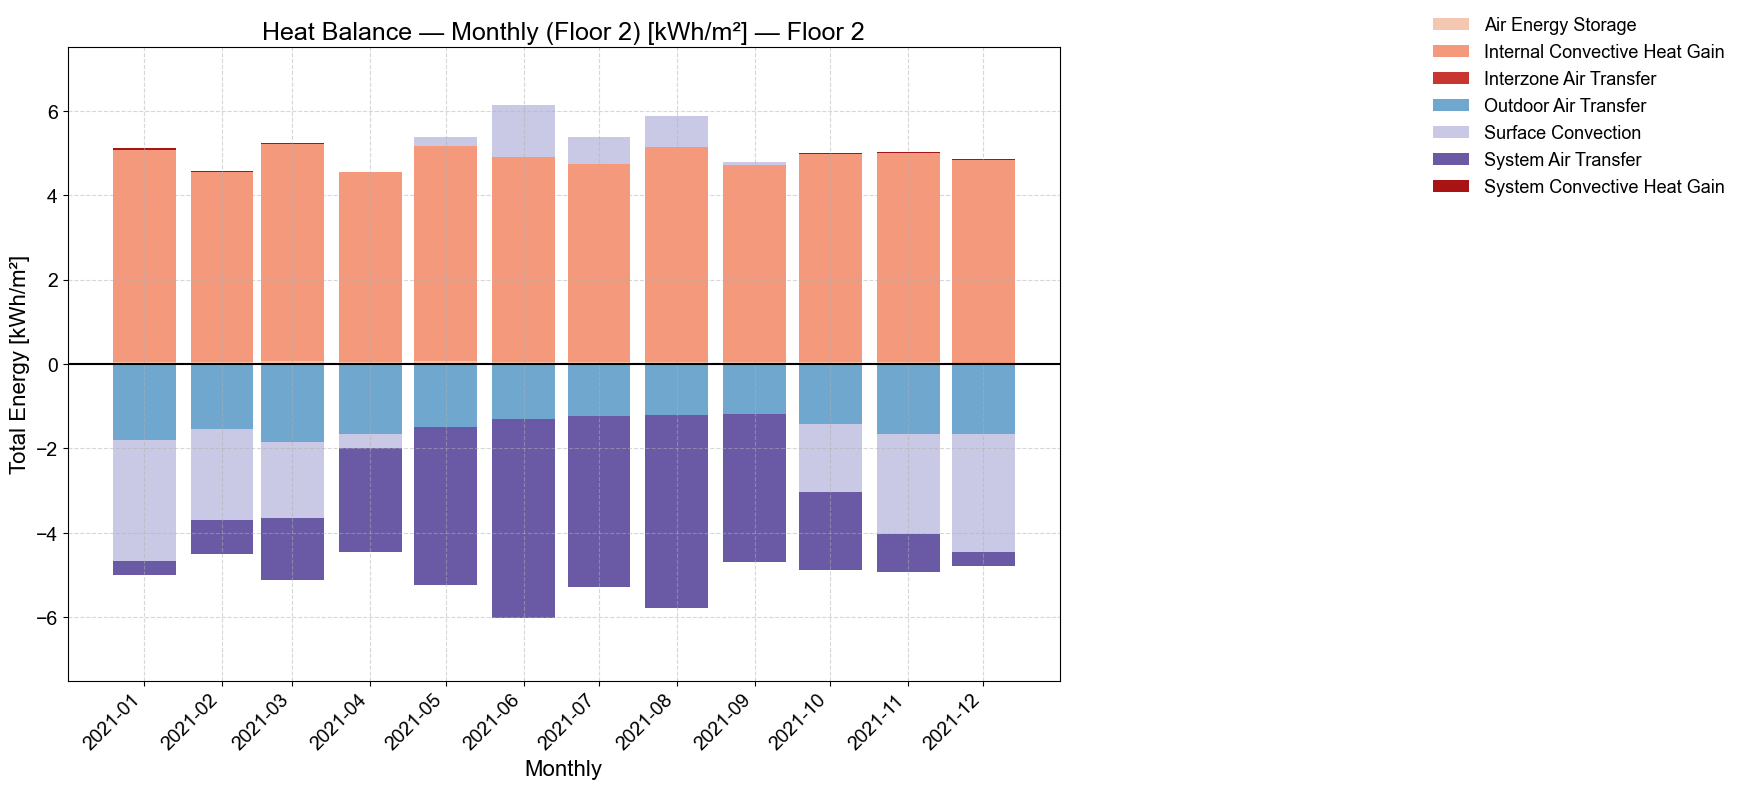

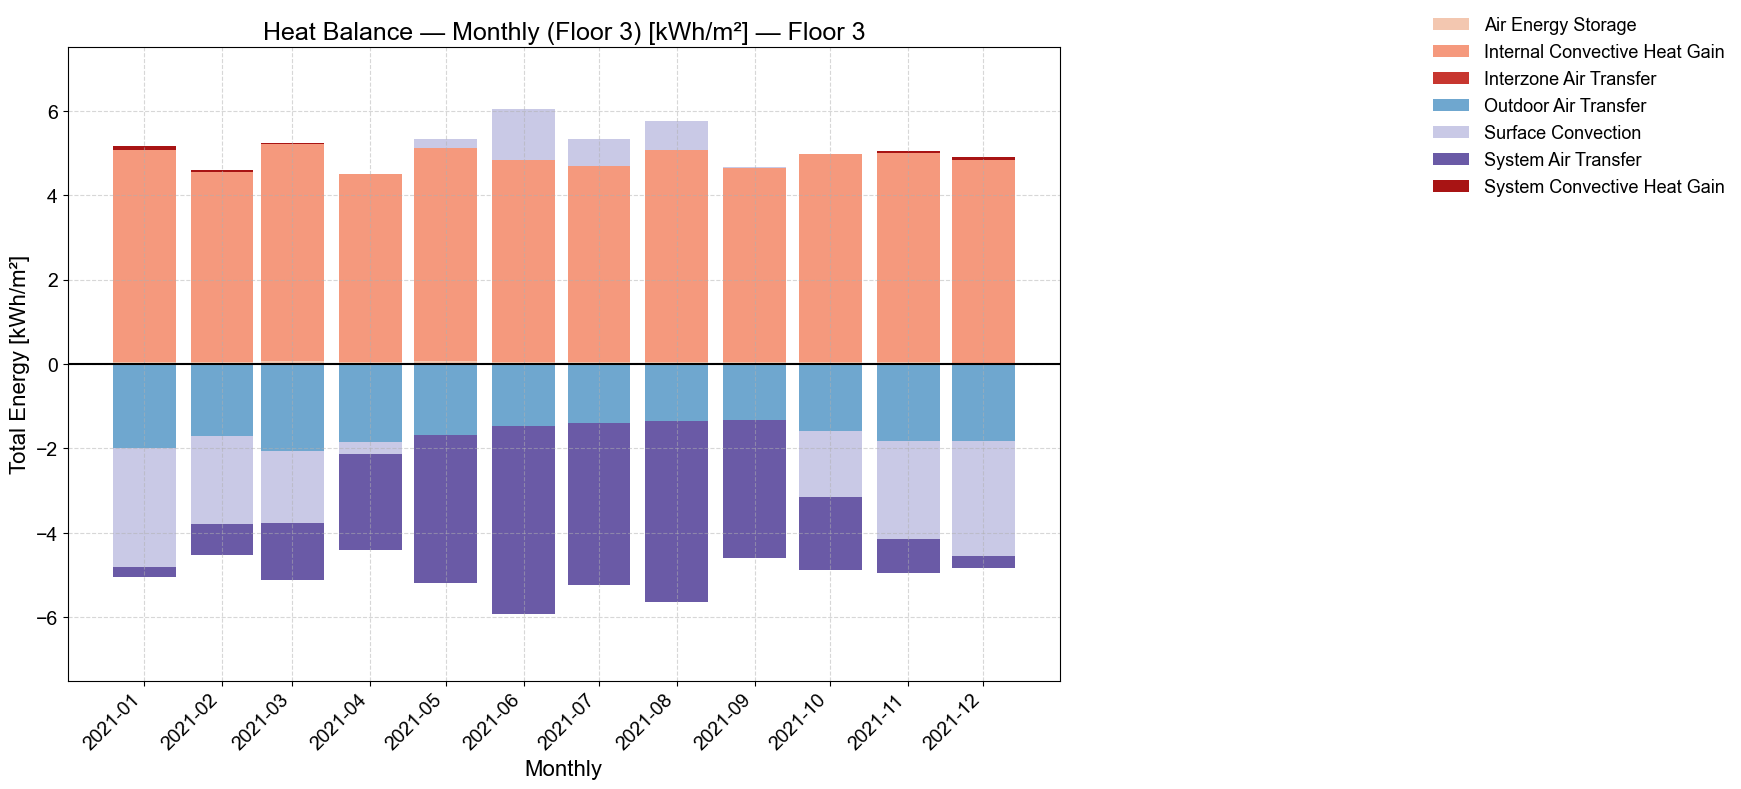

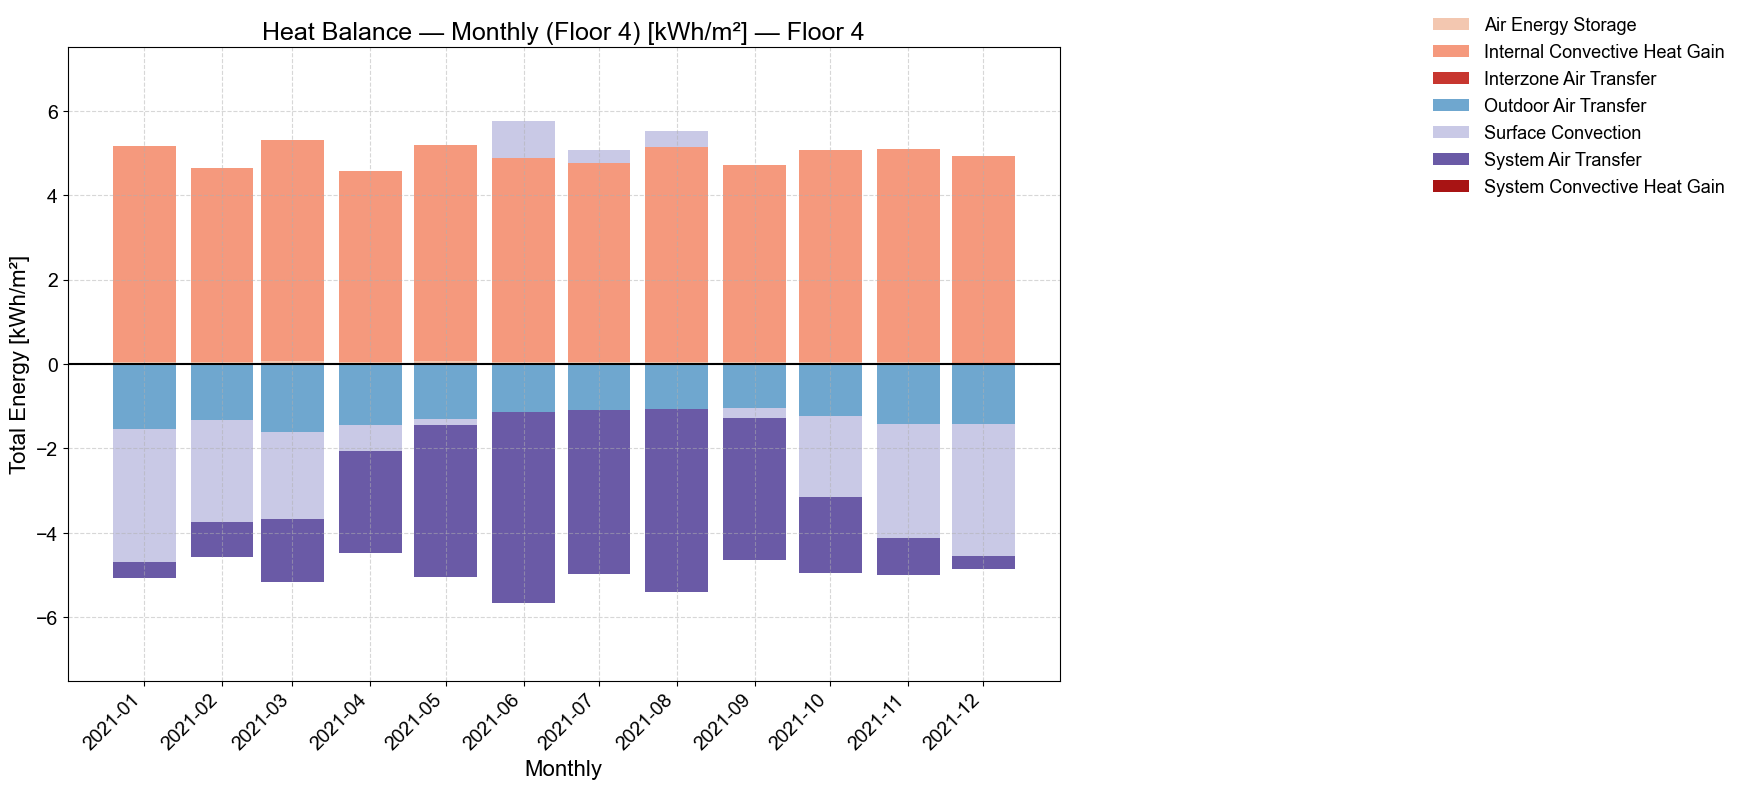

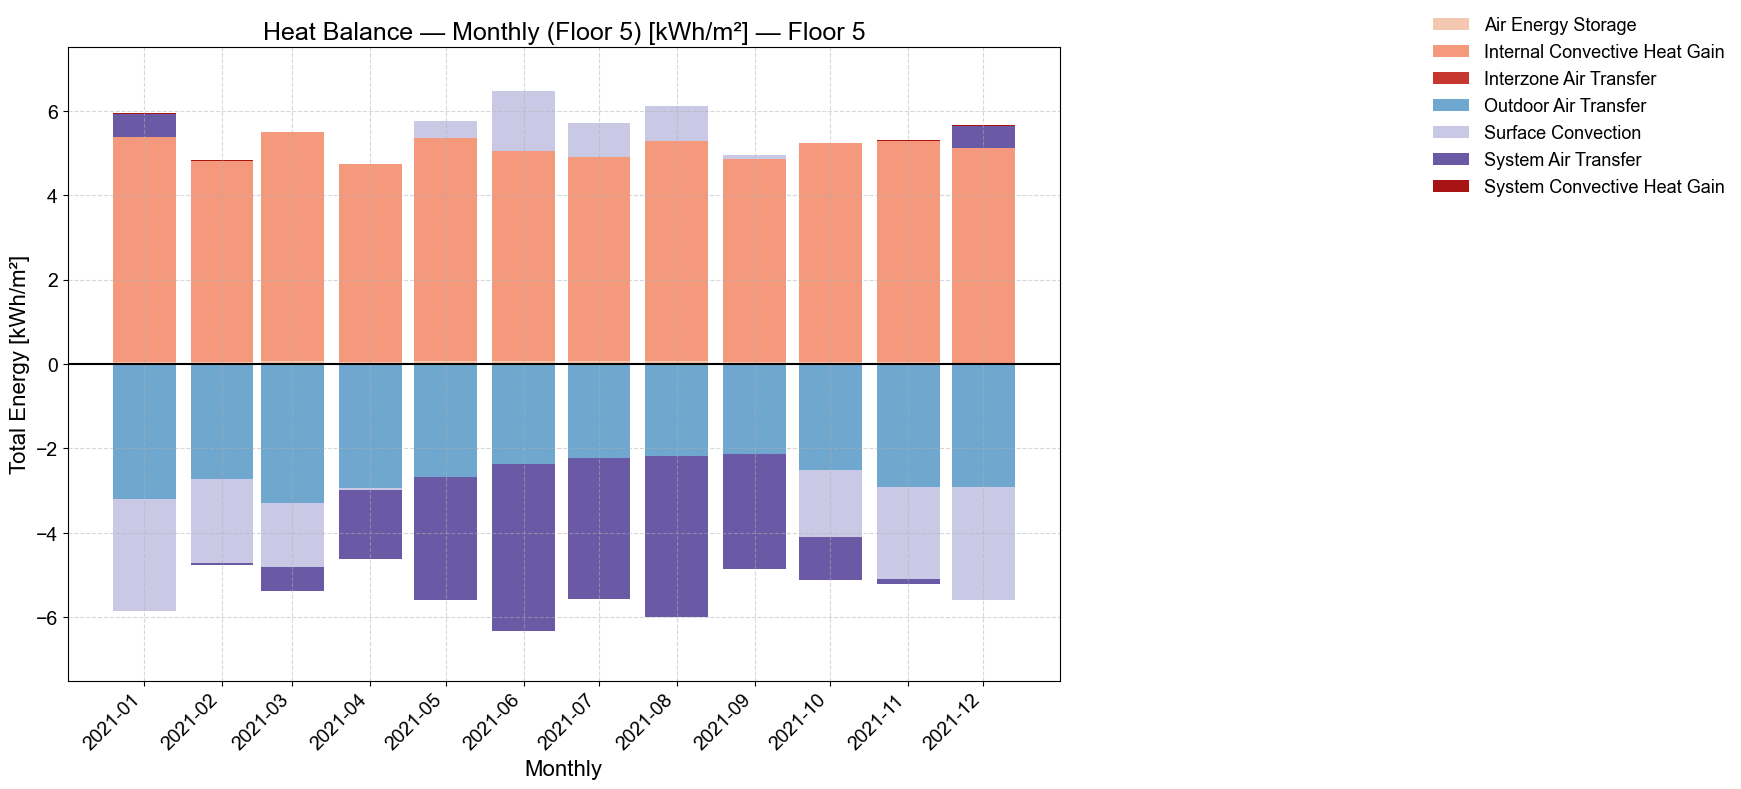

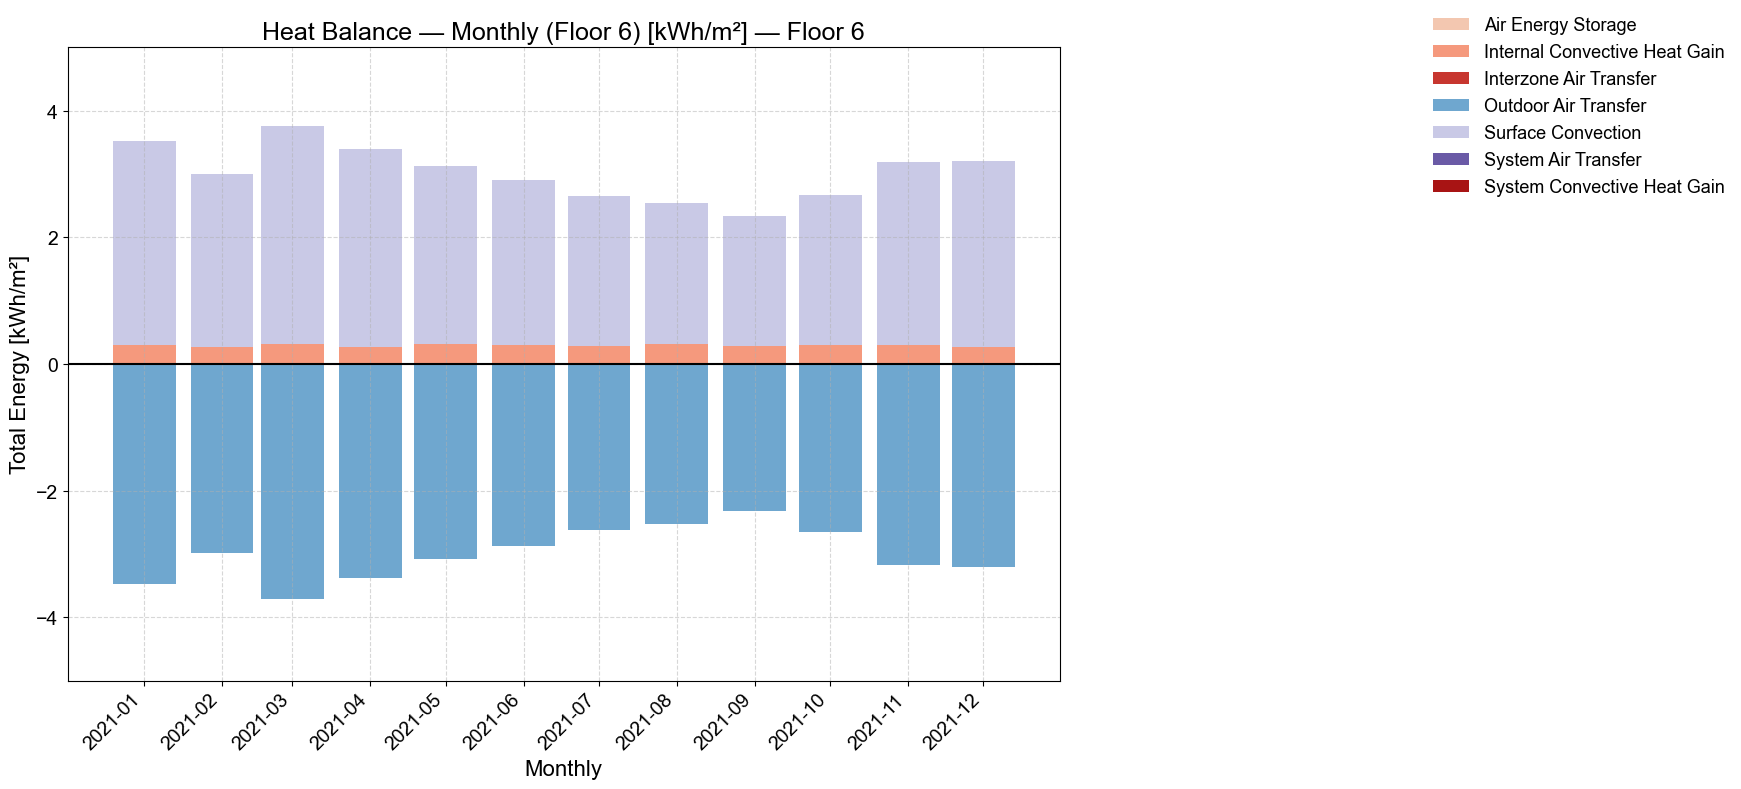

In [19]:
# Floors -1..6 (same colors)
for f in range(-1, 7):
    df_f = get_df(aggs, scale="monthly", scope="floor", floor=f,
                  units="kWh", per_m2=True, long_df_for_area=long_df)
    if df_f.empty:
        print(f"[Info] Floor {f} has no data.")
        continue
    plot_heat_balance(df_f, scale="monthly", scope=f"floor {f}",
                      units="kWh", per_m2=True, fixed_color_map=USER_COLORS, strict_colors=True,
                      title_suffix=f"— Floor {f}")